# Project: Wrangling and Analyze Data WeRateDogs Tweet Archive

## Data Gathering

import all the necessary libraries

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [248]:
WeRateDogs = pd.read_csv('twitter-archive-enhanced.csv')

Use the Requests library to download the tweet image prediction (image_predictions.tsv), open a tsv file and write the content into the tsv file and load the file into pandas dataframe

In [249]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response

with open('image_prediction.tsv', mode='wb') as file:
    file.write(response.content)

Image_prediction = pd.read_csv('image_prediction.tsv', sep='\t')

Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
if os.path.isfile('tweet_json.txt'):
    print("The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

    consumer_key =   #'YOUR CONSUMER KEY'
    consumer_secret =   # 'YOUR CONSUMER SECRET'
    access_token =  #'YOUR ACCESS TOKEN'
    access_secret =   #'YOUR ACCESS SECRET'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = WeRateDogs.tweet_id.values
    len(tweet_ids)
    
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

The dataset has already been downloaded before and written into a tweet_json.txt file. The dataset will be extracted from the file and then loaded into a pandas dataframe called api_tweets

In [251]:
file1 = open('tweet-json.txt', 'r')
lines = file1.readlines()

count = 0

while True:
    line = file1.readline()
    
    
    if not line:
        break
    print("Line{}: {}". format(count, line.strip()))
file1.close()


all_data = []
for i in lines:
    test = json.loads(i)
    data = dict(tweet_id=test['id'], retweet_count=test['retweet_count'],favourite_count=test['favorite_count'])
    all_data.append(data)   

In [252]:
api_tweets = pd.DataFrame(all_data)

## Assessing Data

In [253]:
WeRateDogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [254]:
WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [255]:
WeRateDogs.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [256]:
WeRateDogs.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [257]:
rt_numerator = WeRateDogs.rating_numerator.value_counts()
rt_numerator

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [258]:
WeRateDogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1dc83b58dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc83b60400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc83612790>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc83b609a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc83b60c70>],
 'means': []}

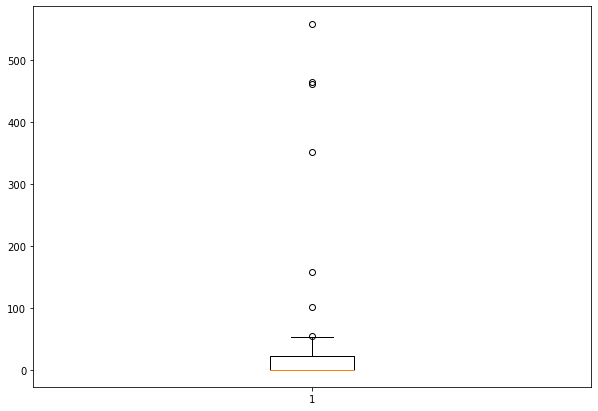

In [259]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(rt_numerator)

In [260]:
Q3 = 12
IQR = 2
Upper_bound = Q3 + (1.5 * IQR)
Upper_bound

15.0

From the boxplot above, we can see that they are outliers above the upper bound which is 15. 

In [261]:
rt_denominator = WeRateDogs.rating_denominator.value_counts()
rt_denominator

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

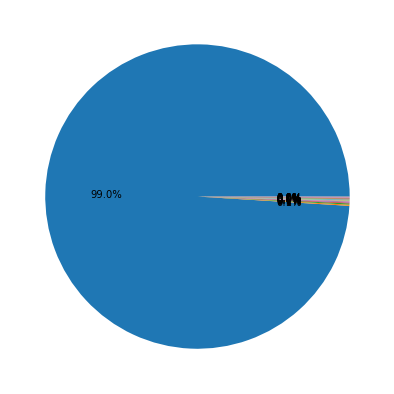

In [262]:
fig = plt.figure(figsize =(10, 7))
plt.pie(rt_denominator, autopct='%1.1f%%')
plt.show()

From the pie chart above we can see that the denominator 10 makes up for 99% of the data.

In [263]:
WeRateDogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [264]:
Image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [265]:
Image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [266]:
Image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [267]:
# Check Image Prediction Table whether the Algorithm correctly classify the images whether they are dogs or not
#choose image url at random
Image_prediction.jpg_url.head(1)

0    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
Name: jpg_url, dtype: object

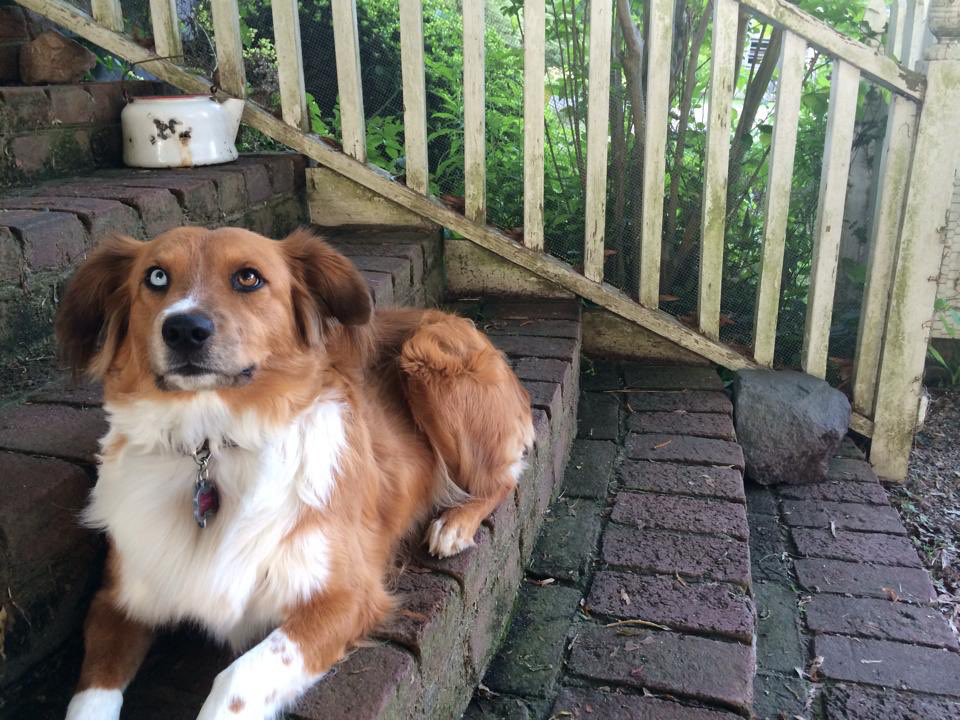

In [268]:
# open image url using requests, BytesIO AND Image libraries
r=requests.get('https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')
i=Image.open(BytesIO(r.content))
i

In [269]:
#confirm if algorithm correctly classify the image
Image_prediction[Image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [270]:
# choose image url at random
Image_prediction.jpg_url.tail(1)

2074    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
Name: jpg_url, dtype: object

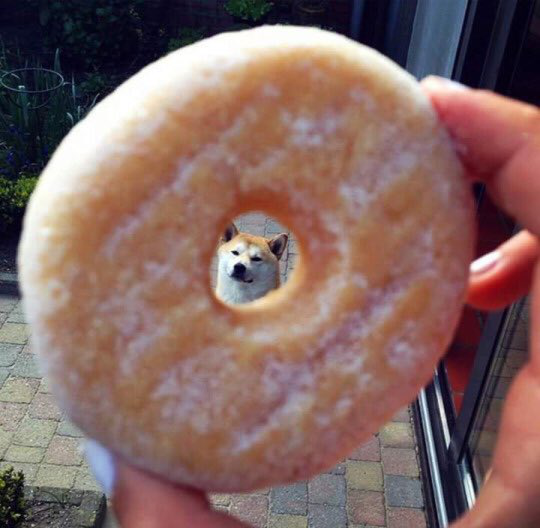

In [271]:
# open image url using requests, BytesIO AND Image libraries
r=requests.get('https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg')
i=Image.open(BytesIO(r.content))
i

In [272]:
#confirm if the algorithm correctly classify the image
Image_prediction[Image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [273]:
#randomly choose image url
Image_prediction.jpg_url[2]

'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg'

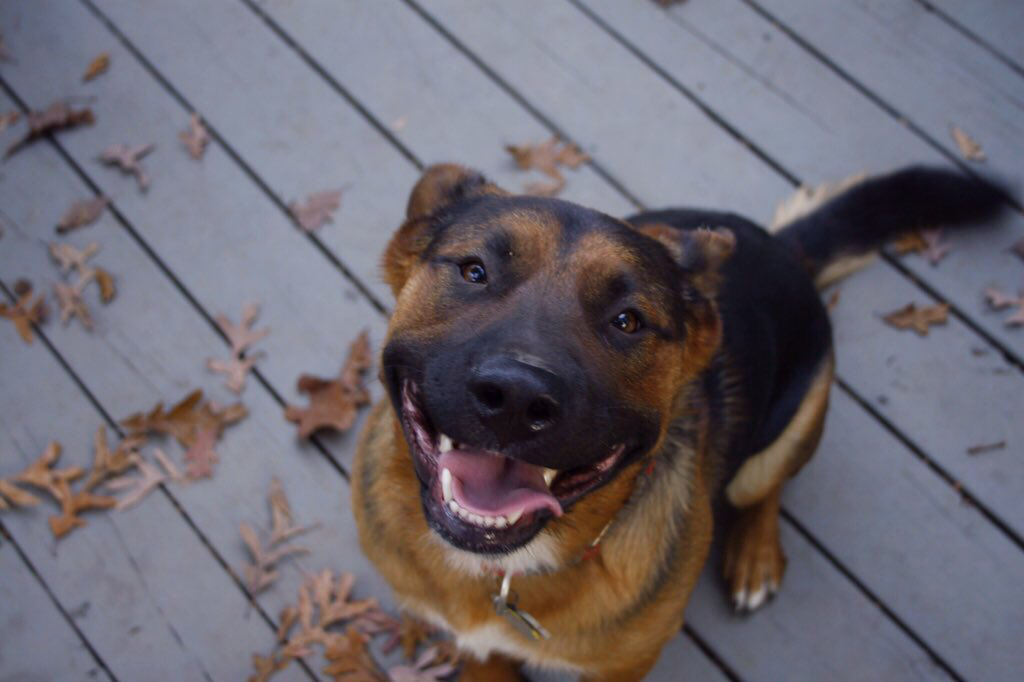

In [274]:
# open image url using requests, BytesIO AND Image libraries
r=requests.get('https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg')
i=Image.open(BytesIO(r.content))
i

In [275]:
#confirm if the algorithm correctly classify the image
Image_prediction[Image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [276]:
api_tweets.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [277]:
api_tweets.describe()

,tweet_id,retweet_count,favourite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [278]:
api_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

##### WeRateDogs Table
- rows containing retweeted comments and no images would be removed since their rating are not original.

- Columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id, contains much missing values and also these columns would not be used in our analyses, hence they are not needed.

- Source Column in the WeRateDogs Table containing where the source of the tweet is in HTML format, this would be changed to clearly depict the source of the tweet.

- rows in the name column that contains dogs that do not have names are replaced with None, a, an, the, this would be changed to not named.

- The timestamp column is in string. This should be in datetime. 

- Dogs whose dog stages were filled with None will be replaced with Not Specified. This is done to prevent any misunderstanding as None is not a dog stage.

- The value 10 in the rating denominator column accounts for 99% of the rating_denominator column data, so values that are greater than 10 would be removed from the dataset, in order to create a new standard column for dog rating using the rating numerator and denominator column.

- Outliers were found in the rating numerator column, so for more accurate analyses, values above the upper bound of 15 would be removed and a new column named standard_rating would be created.



### Tidiness issues
##### WeRateDogs Table
- Columns like doggo, pupper, puppo, and floofer are dog stages and should be in a single column.

- api_tweets containg retweet count and favourite count should be merged with WeRateDogs table which contains dog ranking, because retweet count and favorite count can be used to rank dogs. Also, the jpg_url column in Image_prediction table would be moved with the WeRateDogs table.

## Cleaning Data

In [279]:
# Make copies of original pieces of data
WeRateDogs_copy = WeRateDogs.copy()
Image_prediction_copy = Image_prediction.copy()
api_tweets_copy = api_tweets.copy()

### Tidiness

### Issue 1
Columns like doggo, pupper, puppo, and floofer are dog stages and should be in a single column.

#### Define:

Pandas melt method would be used to collapse all the columns into one.

#### Code

In [280]:
WeRateDogs_copy = pd.melt(WeRateDogs_copy, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                    'retweeted_status_timestamp', 'retweeted_status_user_id',
                                    'timestamp', 'source', 'text', 'expanded_urls',
                                   'rating_numerator', 'rating_denominator', 'name'],
                           var_name='dog_stages', value_name='stage')
WeRateDogs_copy = WeRateDogs_copy.drop('dog_stages', axis=1)
WeRateDogs_copy = WeRateDogs_copy.drop_duplicates()
WeRateDogs_copy = WeRateDogs_copy.drop_duplicates(subset=['tweet_id'], keep='last')

#### Test

In [281]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   retweeted_status_id         181 non-null    float64
 4   retweeted_status_timestamp  181 non-null    object 
 5   retweeted_status_user_id    181 non-null    float64
 6   timestamp                   2356 non-null   object 
 7   source                      2356 non-null   object 
 8   text                        2356 non-null   object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2356 

In [282]:
WeRateDogs_copy.stage.value_counts()

None       2060
pupper      257
puppo        30
floofer       9
Name: stage, dtype: int64

### Issue 2:

api_tweets containg retweet count and favourite count should be merged with WeRateDogs table which contains dog ranking, because retweet count and favorite count can be used to rank dogs, the jpg_url column in Image_prediction table would also be merged with the WeRateDogs tables.

#### Define
api_tweets table would be merged with WeRateDogs Table using pandas merge method

#### Code

In [283]:
WeRateDogs_copy = WeRateDogs_copy.merge(api_tweets, how='outer', on='tweet_id')

#### Test

In [284]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   retweeted_status_id         181 non-null    float64
 4   retweeted_status_timestamp  181 non-null    object 
 5   retweeted_status_user_id    181 non-null    float64
 6   timestamp                   2356 non-null   object 
 7   source                      2356 non-null   object 
 8   text                        2356 non-null   object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2356 

#### Define
the jpg_url column in Image_prediction table would be moved with the WeRateDogs table. Pandas melt method and drop method would be used to accomplish this task.

#### Code

In [285]:
WeRateDogs_copy = WeRateDogs_copy.merge(Image_prediction, on='tweet_id', how="left")

WeRateDogs_copy.drop(["p1", 'p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
                     'img_num'], axis = 1, inplace = True)
Image_prediction_copy.drop('jpg_url', axis = 1, inplace = True)

#### Test

In [286]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   retweeted_status_id         181 non-null    float64
 4   retweeted_status_timestamp  181 non-null    object 
 5   retweeted_status_user_id    181 non-null    float64
 6   timestamp                   2356 non-null   object 
 7   source                      2356 non-null   object 
 8   text                        2356 non-null   object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2356 

In [287]:
Image_prediction_copy.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality

### Issue 3

rows containing retweeted comments and no images would be removed since their rating are not original.

#### Define
pandas drop method would be used to delete rows in the dataset that retweeted comments and no images

#### Code

In [288]:
# drop rows containing retweeted comments
rows_to_delete=['retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id']

for i in rows_to_delete:
    WeRateDogs_copy.drop(WeRateDogs_copy[(WeRateDogs_copy[i].notnull())].index, inplace=True)
WeRateDogs_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favourite_count,jpg_url
0,892420643555336193,NaN,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,NaN,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,NaN,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,NaN,NaN,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,NaN,NaN,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,752519690950500352,NaN,NaN,NaN,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,3917.0,8157.0,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg
2352,751132876104687617,NaN,NaN,NaN,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,1480.0,5610.0,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg
2353,744995568523612160,NaN,NaN,NaN,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,716.0,3277.0,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg
2354,743253157753532416,NaN,NaN,NaN,NaN,NaN,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,1366.0,4624.0,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg


In [289]:
# drop rows that does not have images
WeRateDogs_copy.drop(WeRateDogs_copy[(WeRateDogs_copy['jpg_url'].isnull())].index, inplace=True)

#### Test

In [290]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   retweeted_status_id         0 non-null      float64
 4   retweeted_status_timestamp  0 non-null      object 
 5   retweeted_status_user_id    0 non-null      float64
 6   timestamp                   1994 non-null   object 
 7   source                      1994 non-null   object 
 8   text                        1994 non-null   object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  stage                       1994 

### Issue 4
Columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id, contains much missing values and also these columns would not be used in our analyses, hence they are not needed.

#### Define
Pandas drop method would be used to delete columns that are not needed

#### Code

In [291]:
WeRateDogs_copy = WeRateDogs_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
             'retweeted_status_timestamp'], axis=1)

#### Test

In [292]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   stage               1994 non-null   object 
 9   retweet_count       1994 non-null   float64
 10  favourite_count     1994 non-null   float64
 11  jpg_url             1994 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 202.5+ KB


### Issue 5
Source Column in the WeRateDogs Table containing where the source of the tweet is in HTML format, this would be changed to clearly depict the source of the tweet.

#### Define
pandas replace method along with for loop would be used to change the source column in html format to be more descriptive 

#### Code

In [293]:
#List to change
html_source = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
source_extracted = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [294]:
[WeRateDogs_copy.source.replace(html_source, source_extracted, inplace=True) 
 for source_html, new_source in zip(html_source, source_extracted)];

#### Test

In [295]:
WeRateDogs_copy.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Issue 6
rows in the name column that contains dogs that do not have names are replaced with None, a, an, the, this would be changed to not named.

#### Define
use pandas replace method to accomplish the task above

#### Code

In [296]:
WeRateDogs_copy.name.replace(['None', 'a', 'an', 'the'], 'Not Named', inplace=True)

#### Test

In [297]:
WeRateDogs_copy.name.value_counts().head(30)

Not Named    614
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Toby           7
Lola           7
Koda           6
Bo             6
Jax            6
Stanley        6
Bella          6
Dave           5
Buddy          5
Rusty          5
Louis          5
Bailey         5
Chester        5
Scout          5
Milo           5
Oscar          5
Leo            5
Duke           4
Phil           4
Oakley         4
Name: name, dtype: int64

### Issue 7
The timestamp column is in string. This should be in datetime.

#### Define
pandas to_datetime method would be used to change the timestamp column from string to datetime object

#### Code

In [298]:
WeRateDogs_copy.timestamp = pd.to_datetime(WeRateDogs_copy['timestamp'])

#### Test

In [299]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   stage               1994 non-null   object             
 9   retweet_count       1994 non-null   float64            
 10  favourite_count     1994 non-null   float64            
 11  jpg_url             1994 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Issue 8
dogs whose dog stages were filled with None will be replaced with Not Specified. This is done to prevent any misunderstanding as None is not a dog stage.

#### Define
the replace method would be used to classify dogs whose stages were stated as None to Not Specified.

#### Code

In [300]:
WeRateDogs_copy.stage.replace(['None'], 'not specified', inplace=True)

#### Test

In [301]:
WeRateDogs_copy.stage.value_counts()

not specified    1752
pupper            212
puppo              23
floofer             7
Name: stage, dtype: int64

### Issue 9
The value 10 in the rating denominator column accounts for 99% of the rating_denominator column data, so values that are not equal to 10 would be removed from the dataset, in order to create a new standard column for dog rating using the rating numerator and denominator column.

#### Define 
Values not equal to 10 would be removed from the dataset using the pandas drop method.

#### Code

In [302]:
WeRateDogs_copy.drop(WeRateDogs_copy[(WeRateDogs_copy['rating_denominator'] > 10)].index, inplace=True)

In [303]:
WeRateDogs_copy.drop(WeRateDogs_copy[(WeRateDogs_copy['rating_denominator'] < 10)].index, inplace=True)

#### Test

In [304]:
WeRateDogs_copy.rating_denominator.value_counts()

10    1976
Name: rating_denominator, dtype: int64

### Issue 10

Outliers were found in the rating numerator column, so for more accurate analyses, values above the upper bound 15 would be changed to 15

#### Define
The task above would be achieved using loc method and subsetting

#### Code

In [305]:
WeRateDogs_copy.loc[WeRateDogs_copy['rating_numerator']>15, 'rating_numerator'] = 15

In [306]:
WeRateDogs_copy['standard_rating'] = WeRateDogs_copy['rating_numerator'] / WeRateDogs_copy['rating_denominator']

#### Test

In [307]:
WeRateDogs_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favourite_count,jpg_url,standard_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,not specified,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,not specified,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,not specified,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,not specified,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,not specified,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1.2


In [308]:
WeRateDogs_copy.rating_numerator.value_counts()

12    450
10    419
11    396
13    261
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
15      5
1       4
0       2
Name: rating_numerator, dtype: int64

In [334]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 1 to 1627
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1527 non-null   int64              
 1   timestamp           1527 non-null   datetime64[ns, UTC]
 2   source              1527 non-null   object             
 3   text                1527 non-null   object             
 4   expanded_urls       1527 non-null   object             
 5   rating_numerator    1527 non-null   int64              
 6   rating_denominator  1527 non-null   int64              
 7   name                1527 non-null   object             
 8   stage               1527 non-null   object             
 9   retweet_count       1527 non-null   float64            
 10  favourite_count     1527 non-null   float64            
 11  jpg_url             1527 non-null   object             
 12  standard_rating     1527 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [310]:
WeRateDogs_copy.to_csv('twitter_archive_master.csv', sep=';', index = False, encoding='utf-8', 
columns = ['tweet_id', 'timestamp', 'source','text', 'expanded_urls','rating_numerator',
           'rating_denominator','name','stage','retweet_count','favourite_count','jpg_url'])

## Analyzing and Visualizing Data


### Insights:
1. Relationship between standard_rating column and retweet_count column.

2. Relationship between standard_rating column and favourite_count column.

3. Relationship between the source of the tweet and the standard_rating.

### Visualization

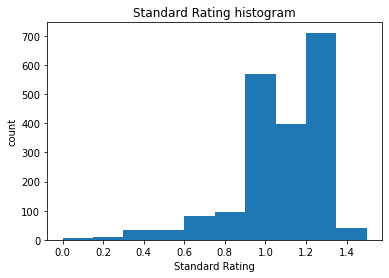

In [311]:
# create an histogram for the standard rating column
fig, ax = plt.subplots()
plt.hist(WeRateDogs_copy.standard_rating)
plt.title('Standard Rating histogram');
ax.set_ylabel('count');
ax.set_xlabel('Standard Rating');

We can see that the standard rating histogram is skewed to the left, this means that the mean is less than the median. The implication of this is that more dogs received a high rating, which can be seen from the chart above.

In [312]:
# Checking the mean and the median of the standard rating column, to confirm the comment made about the standard rating
# histogram
print('mean: {}, median: {}'.format(np.mean(WeRateDogs_copy.standard_rating), np.median(WeRateDogs_copy.standard_rating)))

mean: 1.0560222672064785, median: 1.1


<AxesSubplot:>

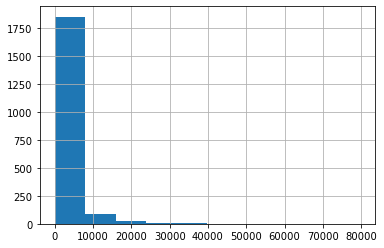

In [313]:
# Create an histogram for the retweet_count column
WeRateDogs_copy.retweet_count.hist()

We can see that the retweet count histogram is skewed to the right but has outliers. So we will create a box plot, in order to locate the position of the outliers.

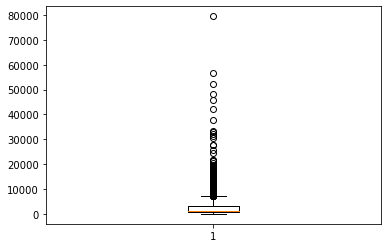

In [314]:
# Create a box plot for the retweet count column to locate the position of the outliers
plt.boxplot(WeRateDogs_copy.retweet_count);

From the box plot above we can see that they are outliers above the upper bound of the retweet column. So, next we use statistical method to pinpoint the exact loaction of the outliers

In [315]:
# Use the describe method to look for the Q3 and Q1, which will help us locate the exact position of the outliers.
WeRateDogs_copy.retweet_count.describe()

count     1976.000000
mean      2769.273785
std       4682.983010
min         16.000000
25%        622.750000
50%       1354.500000
75%       3224.250000
max      79515.000000
Name: retweet_count, dtype: float64

In [316]:
# Calculate the exact position of the outliers
Q3 = 1970.5
Q1 = 532.5
IQR = Q3 - Q1
Upper_boound = Q3 + (1.5 * IQR)
Upper_boound

4127.5

We can see that the outliers are above the value 4127.5, so we are going to plot histogram for values less than or equal to 4127.5

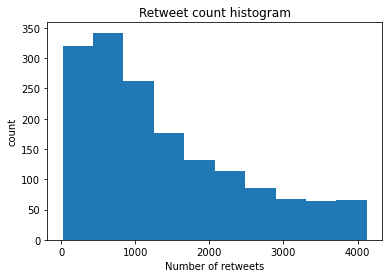

In [317]:
# Plot histogram for values less than 4127.5
WeRateDogs_copy = WeRateDogs_copy[WeRateDogs_copy.retweet_count <= 4127.5].reset_index(drop = True)
fig, ax = plt.subplots()
plt.hist(WeRateDogs_copy.retweet_count);
plt.title('Retweet count histogram');
ax.set_ylabel('count');
ax.set_xlabel('Number of retweets');

 From the retweet histogram above, we can see that the retweet_column histogram is skewed to the right, meaning that the mean of the column is higher than it's median. The implication of this is that although more dogs received a high rating, only some of the dogs received a high number of retweets.

In [318]:
# print out the mean and median of the retweet count column to confirm the comment above.
print('mean: {}, median: {}'.format(np.mean(WeRateDogs_copy.retweet_count), np.median(WeRateDogs_copy.retweet_count)))

mean: 1371.2285012285013, median: 1080.5


<AxesSubplot:>

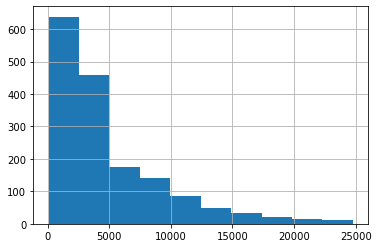

In [319]:
# create an histogram for the favourite count column
WeRateDogs_copy.favourite_count.hist()

The favourite count column is skewed to the riight, but we can see the presence of outliers in this column. So a box plot will be created to locate the exact position of these outliers.

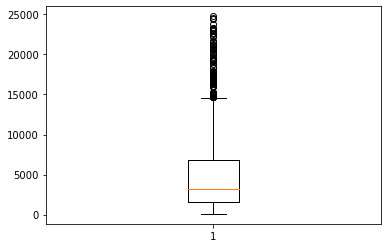

In [320]:
# Create a box plot for the retweet count column to locate the position of the outliers
plt.boxplot(WeRateDogs_copy.favourite_count.reset_index(drop = True));

From the box plot above we can see that they are outliers above the upper bound of the retweet column. So, next we use statistical method to pinpoint the exact loaction of the outliers

In [321]:
# Use the describe method to look for the Q3 and Q1, which will help us locate the exact position of the outliers.
WeRateDogs_copy.favourite_count.describe()

count     1628.000000
mean      4843.911548
std       4665.331949
min         81.000000
25%       1533.750000
50%       3253.000000
75%       6770.750000
max      24773.000000
Name: favourite_count, dtype: float64

In [322]:
# Calculate the exact position of the outliers
Q3 = 6430.5
Q1 = 1515.50
IQR = Q3 - Q1
Upper_boound = Q3 + (1.5 * IQR)
Upper_boound

13803.0

Outliers are spotted above the value 13803.0

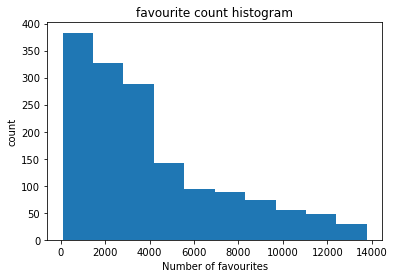

In [323]:
# create an histogram for values less than or equal to 13803.0
WeRateDogs_copy = WeRateDogs_copy[WeRateDogs_copy.favourite_count <= 13803]
fig, ax = plt.subplots()
plt.hist(WeRateDogs_copy.favourite_count);
plt.title('favourite count histogram');
ax.set_ylabel('count');
ax.set_xlabel('Number of favourites');

From the favourite count histogram above, we can see that the favourite_count column histogram is skewed to the right, meaning that the mean of the column is higher than it's median. The implication of this is that although more dogs received a high rating, only some of the dogs received a high number of favourites.

In [324]:
# print out the mean and median of the retweet count column to confirm the comment above.
print('mean: {}, median: {}'.format(np.mean(WeRateDogs_copy.favourite_count), np.median(WeRateDogs_copy.favourite_count)))

mean: 3983.324819908317, median: 3017.0


**Relationship Between standard rating column and retweet column**

<AxesSubplot:xlabel='standard_rating', ylabel='retweet_count'>

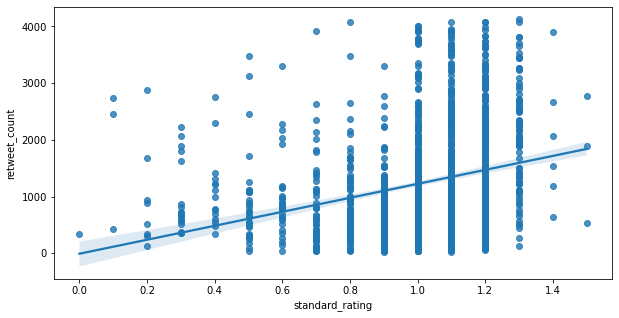

In [326]:
# create a scatter plot using seaborn(sns) to visualize the relationship between 
# dog rating(standard rating) and the retweet count column
plt.figure(figsize=(10,5))
sns.regplot(x = WeRateDogs_copy['standard_rating'], y = WeRateDogs_copy['retweet_count'])


In [327]:
#calculate correlation coeffcients: 
np.corrcoef(WeRateDogs_copy.standard_rating, WeRateDogs_copy.retweet_count)[0,1]

0.2786254204318877

from the plot above we can see that high standard rating does not significantly affect the number of retweet a dog has but it does affects it. This can be proved by the correlation coefficent of variables which is low(0.3)

**Relationship Between standard rating column and favourite count column**

<AxesSubplot:xlabel='standard_rating', ylabel='favourite_count'>

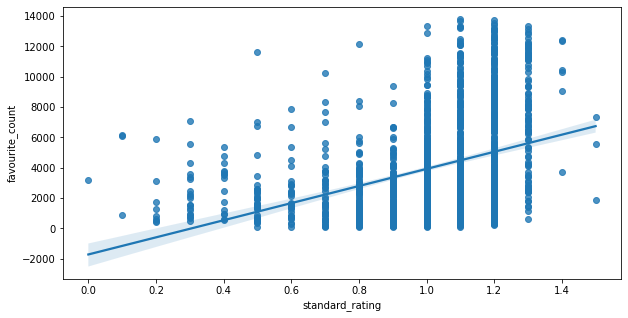

In [328]:
# create a scatter plot using seaborn (sns) to visualize the relationship between dog rating(standard rating) 
# and the favourite count column
plt.figure(figsize=(10,5))
sns.regplot(x = WeRateDogs_copy['standard_rating'], y = WeRateDogs_copy['favourite_count'])

In [329]:
#calculate correlation coeffcients: 
np.corrcoef(WeRateDogs_copy.standard_rating, WeRateDogs_copy.favourite_count)[0,1]

0.3712910090585703

from the plot above we can see that high standard rating does not significantly affect the number of favourites a dog has but it does affects it. This can be proved by the correlation coefficent of variables which is low(0.4)

**Relationship Between source of tweet and standard rating**

In [330]:
# use pandas groupby method to group dog rating(standard rating) by their sources and then use value_counts method 
# to count the number of rating for each source
source_rating = WeRateDogs_copy.groupby('source')['standard_rating'].value_counts().rename('standard_rating_count').to_frame()
source_rating = source_rating.reset_index()
Tweet_Deck = source_rating[source_rating['source']== 'TweetDeck']
Twitter_Web_Client = source_rating[source_rating['source']== 'Twitter Web Client']
Twitter_for_iPhone = source_rating[source_rating['source']== 'Twitter for iPhone']

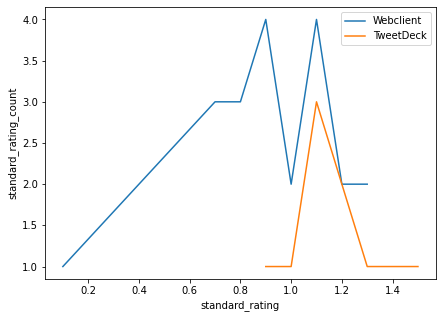

In [331]:
# use seaborn(sns) lineplot method to create line plots to visualize the relationship between the tweetdeck and webclient 
# sources and the number of standard rating for each of these sources.
plt.figure(figsize=(7,5))
sns.lineplot(data=Twitter_Web_Client, x="standard_rating", y="standard_rating_count")
sns.lineplot(data=Tweet_Deck, x="standard_rating", y="standard_rating_count")
plt.legend(['Webclient', 'TweetDeck'])

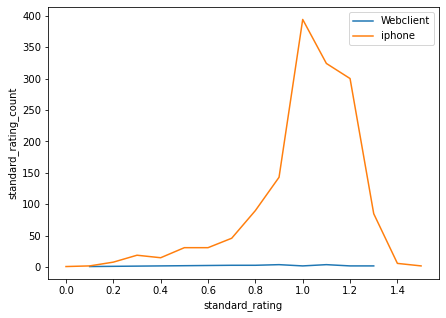

In [332]:
# use seaborn(sns) lineplot method to create line plots to visualize the relationship between the webclient and iphone 
# sources and the number of standard rating for each of these sources.
plt.figure(figsize=(7,5))
sns.lineplot(data=Twitter_Web_Client, x="standard_rating", y="standard_rating_count")
sns.lineplot(data=Twitter_for_iPhone, x="standard_rating", y="standard_rating_count")
plt.legend(['Webclient', 'iphone'])

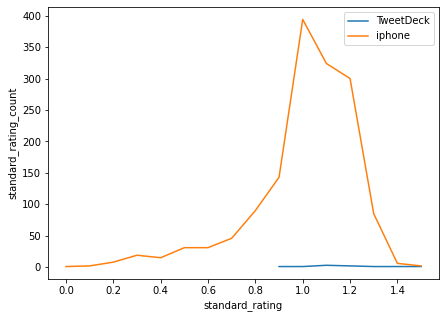

In [333]:
# use seaborn(sns) lineplot method to create line plots to visualize the relationship between the tweetdeck and iphone 
# sources and the number of standard rating for each of these sources.
plt.figure(figsize=(7,5))
sns.lineplot(data=Tweet_Deck, x="standard_rating", y="standard_rating_count")
sns.lineplot(data=Twitter_for_iPhone, x="standard_rating", y="standard_rating_count")
plt.legend(['TweetDeck', 'iphone'])